# Deep Learning Course: Lab Exercises

In this lab exercise you will:

a) Learn about PyTorch DataLoaders and how to build your own on a custom dataset.

b) Learn how to train and evaluate a convolutional neural network.



#**Q1 DataLoaders**

#Connect your drive account

In order to upload the numpy files of the given folder, you can use the ‘drive’ package from google.colab library like this:

- from google.colab import drive

Then, you define the destination of your Drive account like this:

- drive=drive.mount('/content/drive')

Finally, you can load files from the given folder in this way:

- arr_train_labels=np.load('drive/.._folderdestination_../train_labels.npy')

In [1]:
import numpy as np
import pandas as pd
from google.colab import drive

drive = drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
## load train, test and validation label arrays
##here put your custom destination folder
# *****START CODE
train_images = np.load('drive/MyDrive/FDL/FDL-LAB03/train_images.npy')
val_images = np.load('drive/MyDrive/FDL/FDL-LAB03/val_images.npy')
test_images = np.load('drive/MyDrive/FDL/FDL-LAB03/test_images.npy')

train_labels = np.load('drive/MyDrive/FDL/FDL-LAB03/train_labels.npy')
val_labels = np.load('drive/MyDrive/FDL/FDL-LAB03/val_labels.npy')
test_labels = np.load('drive/MyDrive/FDL/FDL-LAB03/test_labels.npy')
# *****END CODE

In [3]:
print('train images', train_images.shape)
print('val images', val_images.shape)
print('test images', test_images.shape)
print('train labels', train_labels.shape)
print('val labels', val_labels.shape)
print('test labels', test_labels.shape)

train images (5000, 1, 28, 28)
val images (1000, 1, 28, 28)
test images (1000, 1, 28, 28)
train labels (5000,)
val labels (1000,)
test labels (1000,)


In [ ]:
print(train_images[0])

[[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  22
    47  72  89  47  47 164 230 176   0   0   0]
  [  0   0   0   0   0   0   0  13  99 116  57  

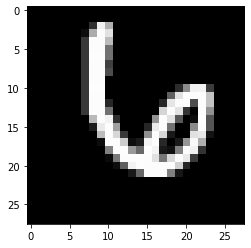

In [ ]:
from matplotlib import pyplot as plt

##print a random image
# *****START CODE
plt.imshow(train_images[124][0], cmap='gray')
plt.show()
# *****END CODE

In [ ]:
##print the corresponding label
# *****START CODE
print(train_labels[124])
# *****END CODE

6


Iterate through the training images with a for loop and collate batches of size 10 (using slicing)

In [ ]:
batchsize = 10
# *****START CODE
for i in range(0, len(train_images), batchsize):
    img_batch = train_images[i:i+batchsize]
    lbl_batch = train_labels[i:i+batchsize]
    print(i)
    print('img_batch', img_batch.shape)
    print('lbl_batch', lbl_batch.shape)
# *****END CODE    

#Familiarize with .csv files

Here, we show you how to create a csv file with the the following table:

| Name         | Surname        | Gender | 
| ------------ | ------------ | ------- | 
| Mary         | Smith        | Female       |
| James        | Williams     | Male     | 
| Sarah        | Martin       | Female      | 
| Peter        | Miller       | Male     | 

In [4]:
import pandas as pd

# First create each column as a list

names = ['Mary', 'James', 'Sarah', 'Peter']
surnames = ['Smith', 'Williams', 'Martin', 'Miller']
genders = ['Female', 'Male', 'Female', 'Male']

# Then create a pandas DataFrame from these lists and set the columns names

df = pd.DataFrame({'Name': names ,
                       'Surname': surnames ,
                       'Gender': genders ,
                      })

# Finally save the DataFrame to a .csv file
df.to_csv('drive/MyDrive/FDL/FDL-LAB03/toy.csv', index=False, columns = ['Name', 'Surname', 'Gender'])

# You can now read the .csv file to get a DataFrame again
toy = pd.read_csv('drive/MyDrive/FDL/FDL-LAB03/toy.csv')

# And show few rows of the the DataFrame
toy.head()

,Name,Surname,Gender
0,Mary,Smith,Female
1,James,Williams,Male
2,Sarah,Martin,Female
3,Peter,Miller,Male


Use iloc command from 	[pandas library](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html 'Learn .iloc') pandas library to access specific items

In [ ]:
##show first column
toy.iloc[:,0]

0     Mary
1    James
2    Sarah
3    Peter
Name: Name, dtype: object

In [ ]:
##show second row
toy.iloc[1,:]    

Name          James
Surname    Williams
Gender         Male
Name: 1, dtype: object

In [ ]:
##show element in first row and second column
toy.iloc[0,1]

'Smith'

#Create your own custom DataLoader

Use the numpy files to define your own custom dataloader.

a) Create a DataFrame for each split (train, val and test) with 2 columns :
- ‘image_ID’, which involves the image index locations
- ‘labels’, which involves the corresponding label for every image index

b) Plot the distribution of labels for each split with [groupby().count()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) and [pandas.Series.plot()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.html?highlight=plot#pandas.Series.plot 'pandas.Series.plot') functions.

c) Save the DataFrames as .csv files.

In [ ]:
## Create the DataFrame for the train split and show the first few rows
# *****START CODE
df = pd.DataFrame({'image_ID': np.arange(len(train_labels)),
                       'label': train_labels,
                  })
df.head()
# *****END CODE

,image_ID,label
0,0,8
1,1,5
2,2,6
3,3,4
4,4,6


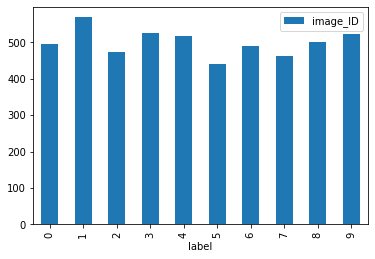

In [ ]:
## Plot the distribution of labels using a bar plot
# *****START CODE
counts = df.groupby(['label']).count()
counts.plot.bar()
# *****END CODE

In [ ]:
## Save the DataFrame as a .csv file
# *****START CODE
df.to_csv('drive/MyDrive/FDL/FDL-LAB03/train.csv', index=False, columns = ['image_ID', 'label'])
# *****END CODE

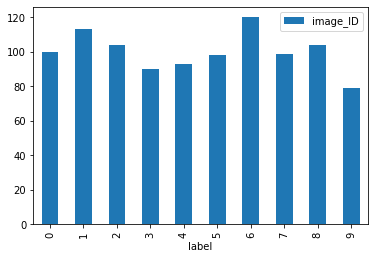

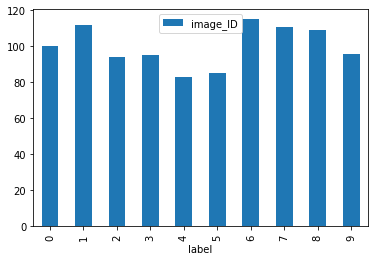

In [ ]:
## Do the same for both val and test splits
## HINT : you can wrap the previous steps into a function to do all 3 at once
# *****START CODE
def create_csv(labels, destination):
  df = pd.DataFrame({'image_ID': np.arange(len(labels)),
                       'label': labels,
                  })
  
  counts = df.groupby(['label']).count()
  counts.plot.bar()

  df.to_csv(destination, index=False, columns = ['image_ID', 'label'])

create_csv(val_labels, 'drive/MyDrive/FDL/FDL-LAB03/val.csv')
create_csv(test_labels, 'drive/MyDrive/FDL/FDL-LAB03/test.csv')
# *****END CODE

b) Now create your own custom dataloader. When building a custom dataloader, it is necessary to define a class which involves 3 required functions:

- __init__, for the class initialization

- __getitem__, for data extraction according to given indexes

-  __len__, for calculating the total number of data samples

In [ ]:
from torch.utils.data.dataset import Dataset

class MyDataset(Dataset):
    def __init__(self, csv_path, images_file):
        ## Read the csv file with pandas library
        # *****START CODE
        self.data_info = pd.read_csv(csv_path)
        # *****END CODE
        ##Load the numpy array of images
        self.images = np.load(images_file)

    def __getitem__(self, index):
        ## Get the image-label set using the given index
        ## Hint: use iloc command from pandas library
        # *****START CODE
        image_id = (self.data_info.iloc[index,0])
        image = self.images[image_id]

        label = int(self.data_info.iloc[index,1])
        # *****END CODE
        ## bring all image spectral values to the range of [0,1]
        image = image/255.0

        return image, label

    def __len__(self):
        ## return the total number of data samples
        return len(self.data_info)

c) Call the dataloader for both the training and the validation sets

In [ ]:
from torch.utils.data import DataLoader

## training and validation .csv paths
##here put your custom destination folder
train_csv_file = 'drive/MyDrive/FDL/FDL-LAB03/train.csv'
val_csv_file = 'drive/MyDrive/FDL/FDL-LAB03/val.csv'

## paths for training and validation numpy array images
##here put your custom destination folder
train_images_file = 'drive/MyDrive/FDL/FDL-LAB03/train_images.npy'
val_images_file = 'drive/MyDrive/FDL/FDL-LAB03/val_images.npy'

## define and create training and validation dataloaders using MyDataset (fill the blanks)
# *****START CODE
## define and create training and validation dataloaders using MyDataset (fill the blanks)
train_dataset = MyDataset(train_csv_file, train_images_file)
val_dataset = MyDataset(val_csv_file, val_images_file)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False)
# *****END CODE

Iterate through your dataloader using a for loop.

In [ ]:
from tqdm import tqdm
for i, batch, in enumerate(tqdm(train_dataloader)):
      img_batch, labels = batch
      print('img', img_batch.shape)
      print('labels', labels.shape)

#**Q2 Classification problem**

Define your custom convolutional neural network.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class ConvNet(nn.Module):
    def __init__(self, in_ch, out_ch):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(in_ch, 32, 3, 1) #W2=(W1−F+2P)/S+1
        ##define a second convolutional layer, which outputs 64 channels
        # *****START CODE
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        # *****END CODE
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout2d(0.5)
        ##create the last two fully connected layers
        # *****START CODE
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, out_ch)
        # *****END CODE

##define the forward propagation of the data
##conv1--relu--conv2--maxpool--dropout1--fc1--dropout2--fc2
    def forward(self, x):
        # *****START CODE
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.max_pool2d(x, 2) #W2=(W1−F)/S+1
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = x  #F.log_softmax(x, dim=1)
         # *****END CODE       
        return output

In [ ]:
# define model
# *****START CODE
model = ConvNet(1,10)
# *****END CODE

In [ ]:
import torch
# define optimizer, criterion and number of training epochs
# *****START CODE
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()
epochs = 10
# *****END CODE

In [ ]:
!pip install torchnet
import torchnet as tnt # why not use torch metrics ?

# define confusion matrix using tnt package
confusion_matrix = tnt.meter.ConfusionMeter(10)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 12.2 MB/s 
     |████████████████████████████████| 55 kB 3.2 MB/s 
  Created wheel for torchnet: filename=torchnet-0.0.4-py3-none-any.whl size=29743 sha256=fe66068957f5c72494478fa688a12de5335ef1f0e5d1ff4d3d9fba5e2b73c28c
  Stored in directory: /root/.cache/pip/wheels/93/17/b3/86db1d93e9dae198813aa79831b403e4844d67986cf93894b5
  Created wheel for visdom: filename=visdom-0.2.3-py3-none-any.whl size=1417108 sha256=88c0ca94b96c2d6672c2db717808e5c149d934845122df400e18e63d73b10d6c
  Stored in directory: /root/.cache/pip/wheels/6c/cc/34/0a5e6c65ecd5efecaebb4e9a913d438643dbc50e739d1662ca
Successfully built torchnet visdom


In [ ]:
# create a directory for saving the models and the training progress
save_folder = 'drive/MyDrive/FDL/FDL-LAB03/models'

In [ ]:
##function which saves the overall accuracy and average loss at the end of each epoch,
##both for the training and the validation set
def write_results(save_folder, epoch, train_acc, val_acc, train_loss, val_loss):
    with open('./{}/progress.txt'.format(save_folder),'a') as ff:
      ff.write(' E: ')
      ff.write(str(epoch))
      ff.write('         ')
      ff.write(' TRAIN_OA: ')
      ff.write(str('%.3f' % train_acc))
      ff.write(' VAL_OA: ')
      ff.write(str('%.3f' % val_acc))
      ff.write('         ')
      ff.write(' TRAIN_LOSS: ')
      ff.write(str('%.3f' % train_loss))
      ff.write(' VAL_LOSS: ')
      ff.write(str('%.3f' % val_loss))
      ff.write('\n')

In [ ]:
import matplotlib.pyplot as plt
#function that creates the train-val loss graph
#variables 'train_loss' and 'val_loss' are losts containing the average losses for all the epochs
def save_graph(train_loss, val_loss, nb_epochs, save_folder):
    plt.plot(list(range(nb_epochs+1))[1:], train_loss)
    plt.plot(list(range(nb_epochs+1))[1:], val_loss)
    plt.legend(['train', 'val'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.savefig('{}/chart.png'.format(save_folder))

  0%|          | 0/157 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
  2%|▏         | 3/157 [00:00<00:21,  7.01it/s]

Train (epoch 1/10) [0/157 (0%)]	Loss: 2.306839


 65%|██████▍   | 102/157 [00:11<00:09,  5.95it/s]

Train (epoch 1/10) [100/157 (64%)]	Loss: 2.058458


100%|██████████| 32/32 [00:01<00:00, 16.62it/s]


Confusion Matrix:
[[ 89   0   2   1   0   0   8   0   0   0]
 [  0 109   2   1   0   0   0   0   1   0]
 [  1   2  81   2   0   0  16   0   2   0]
 [  1   6   2  69   0   0   2   3   7   0]
 [  0   1   0   0  86   0   5   0   1   0]
 [ 13   9   1  19   6  29   6   1  13   1]
 [  1   3   0   0   2   0 114   0   0   0]
 [  2  10   0   0   3   0   0  81   3   0]
 [  5   8   0  11   3   0   5   1  71   0]
 [  3   4   0   1  38   0   0  11   8  14]]
TRAIN_LOSS:  2.084 TRAIN_ACC:  38.120
VAL_LOSS:  1.401 VAL_ACC:  74.300


  1%|▏         | 2/157 [00:00<00:22,  6.76it/s]

Train (epoch 2/10) [0/157 (0%)]	Loss: 1.537212


 65%|██████▍   | 102/157 [00:08<00:04, 13.51it/s]

Train (epoch 2/10) [100/157 (64%)]	Loss: 1.071206


100%|██████████| 32/32 [00:00<00:00, 34.68it/s]


Confusion Matrix:
[[ 94   0   1   0   1   0   2   0   2   0]
 [  0 106   2   1   0   0   0   0   3   1]
 [  2   0  89   2   0   0   5   2   4   0]
 [  1   3   1  72   0   2   1   3   7   0]
 [  1   0   0   0  89   0   2   0   1   0]
 [  2   3   2   7   5  62   2   0  13   2]
 [  1   2   1   0   4   1 110   0   1   0]
 [  1   2   1   0   0   0   0  94   0   1]
 [  1   3   0   5   0   1   0   1  91   2]
 [  0   0   0   1   8   0   0   7   4  59]]
TRAIN_LOSS:  0.941 TRAIN_ACC:  72.420
VAL_LOSS:  0.477 VAL_ACC:  86.600


  1%|▏         | 2/157 [00:00<00:11, 13.20it/s]

Train (epoch 3/10) [0/157 (0%)]	Loss: 0.787707


 65%|██████▍   | 102/157 [00:07<00:04, 13.36it/s]

Train (epoch 3/10) [100/157 (64%)]	Loss: 0.531476


100%|██████████| 32/32 [00:00<00:00, 34.90it/s]


Confusion Matrix:
[[ 96   0   0   1   1   0   2   0   0   0]
 [  0 110   1   1   0   0   0   0   0   1]
 [  3   0  78   9   4   0   7   1   1   1]
 [  1   4   1  81   0   1   2   0   0   0]
 [  1   0   0   0  92   0   0   0   0   0]
 [  5   4   0   6   7  71   2   0   1   2]
 [  1   1   0   0   7   0 111   0   0   0]
 [  1   5   0   0   2   1   0  81   0   9]
 [  3   7   0  21   7   5   1   0  59   1]
 [  1   1   0   3  25   0   0   2   0  47]]
TRAIN_LOSS:  0.582 TRAIN_ACC:  81.880
VAL_LOSS:  0.487 VAL_ACC:  82.600


  1%|▏         | 2/157 [00:00<00:12, 12.60it/s]

Train (epoch 4/10) [0/157 (0%)]	Loss: 0.601963


 65%|██████▍   | 102/157 [00:07<00:04, 13.31it/s]

Train (epoch 4/10) [100/157 (64%)]	Loss: 0.188638


100%|██████████| 32/32 [00:00<00:00, 35.07it/s]


Confusion Matrix:
[[ 95   0   0   1   0   1   2   1   0   0]
 [  0 109   1   0   0   0   0   0   2   1]
 [  0   0  89   4   0   0   6   2   3   0]
 [  1   0   2  77   0   4   1   3   2   0]
 [  0   0   4   0  80   0   4   1   0   4]
 [  3   1   0   2   0  84   2   2   4   0]
 [  1   1   0   0   0   0 118   0   0   0]
 [  1   3   0   0   0   0   0  95   0   0]
 [  3   3   0   8   0   3   1   1  84   1]
 [  1   0   1   2   0   0   0   7   0  68]]
TRAIN_LOSS:  0.487 TRAIN_ACC:  85.540
VAL_LOSS:  0.336 VAL_ACC:  89.900


  1%|▏         | 2/157 [00:00<00:12, 12.37it/s]

Train (epoch 5/10) [0/157 (0%)]	Loss: 0.784167


 65%|██████▍   | 102/157 [00:07<00:04, 13.34it/s]

Train (epoch 5/10) [100/157 (64%)]	Loss: 0.264249


100%|██████████| 32/32 [00:00<00:00, 34.78it/s]


Confusion Matrix:
[[ 93   0   1   1   1   0   2   2   0   0]
 [  0 108   2   0   0   0   0   0   2   1]
 [  0   0  93   0   0   0   6   2   3   0]
 [  0   3   1  75   0   3   2   3   2   1]
 [  0   0   2   0  83   0   3   0   0   5]
 [  2   1   0   2   2  81   3   1   3   3]
 [  1   1   0   0   2   0 116   0   0   0]
 [  1   1   1   0   1   0   0  91   0   4]
 [  1   3   0   6   1   2   1   1  85   4]
 [  0   0   0   1   0   0   0   2   0  76]]
TRAIN_LOSS:  0.446 TRAIN_ACC:  86.380
VAL_LOSS:  0.295 VAL_ACC:  90.100


  1%|▏         | 2/157 [00:00<00:12, 12.34it/s]

Train (epoch 6/10) [0/157 (0%)]	Loss: 0.313098


 65%|██████▍   | 102/157 [00:07<00:04, 13.50it/s]

Train (epoch 6/10) [100/157 (64%)]	Loss: 0.346796


100%|██████████| 32/32 [00:01<00:00, 23.21it/s]


Confusion Matrix:
[[ 95   0   0   1   0   0   3   0   0   1]
 [  0 109   1   0   0   0   0   0   2   1]
 [  0   0  96   0   0   0   5   1   2   0]
 [  0   1   2  78   0   3   2   1   3   0]
 [  0   0   2   0  83   0   3   0   0   5]
 [  3   1   0   2   3  83   3   0   1   2]
 [  1   1   0   0   0   0 118   0   0   0]
 [  1   1   0   1   1   1   0  89   0   5]
 [  2   2   0   5   1   3   0   0  89   2]
 [  1   0   0   1   1   0   0   1   1  74]]
TRAIN_LOSS:  0.395 TRAIN_ACC:  88.100
VAL_LOSS:  0.269 VAL_ACC:  91.400


  1%|▏         | 2/157 [00:00<00:19,  7.90it/s]

Train (epoch 7/10) [0/157 (0%)]	Loss: 0.417526


 66%|██████▌   | 103/157 [00:09<00:04, 13.01it/s]

Train (epoch 7/10) [100/157 (64%)]	Loss: 0.142263


100%|██████████| 32/32 [00:00<00:00, 35.74it/s]


Confusion Matrix:
[[ 93   0   1   1   1   1   2   1   0   0]
 [  0 108   3   0   0   0   0   0   1   1]
 [  0   0 102   0   0   0   2   0   0   0]
 [  0   0   6  78   0   4   1   1   0   0]
 [  0   0   4   0  88   0   0   0   0   1]
 [  2   0   2   3   3  85   1   0   0   2]
 [  1   1   4   0   0   0 114   0   0   0]
 [  1   0   2   2   1   0   0  93   0   0]
 [  1   2   6   8   3   4   0   1  77   2]
 [  1   0   1   2   2   0   0   3   0  70]]
TRAIN_LOSS:  0.360 TRAIN_ACC:  88.780
VAL_LOSS:  0.294 VAL_ACC:  90.800


  1%|▏         | 2/157 [00:00<00:11, 12.92it/s]

Train (epoch 8/10) [0/157 (0%)]	Loss: 0.513274


 65%|██████▍   | 102/157 [00:07<00:04, 13.33it/s]

Train (epoch 8/10) [100/157 (64%)]	Loss: 0.381792


100%|██████████| 32/32 [00:00<00:00, 35.03it/s]


Confusion Matrix:
[[ 94   0   1   0   0   0   2   3   0   0]
 [  0 108   2   0   0   0   0   0   2   1]
 [  0   0  98   0   0   0   4   2   0   0]
 [  1   0   3  76   0   5   2   2   1   0]
 [  0   0   2   0  84   0   4   1   0   2]
 [  1   0   0   0   0  92   2   2   1   0]
 [  1   1   0   0   0   0 118   0   0   0]
 [  0   0   2   0   0   0   0  97   0   0]
 [  1   2   1   8   0   5   1   1  84   1]
 [  1   0   0   3   0   0   0  15   0  60]]
TRAIN_LOSS:  0.347 TRAIN_ACC:  89.160
VAL_LOSS:  0.288 VAL_ACC:  91.100


  1%|▏         | 2/157 [00:00<00:11, 13.55it/s]

Train (epoch 9/10) [0/157 (0%)]	Loss: 0.214630


 65%|██████▍   | 102/157 [00:07<00:04, 13.40it/s]

Train (epoch 9/10) [100/157 (64%)]	Loss: 0.122152


100%|██████████| 32/32 [00:00<00:00, 35.12it/s]


Confusion Matrix:
[[ 94   0   0   1   1   0   2   2   0   0]
 [  0 109   2   0   0   0   0   0   1   1]
 [  0   0  96   3   0   0   3   2   0   0]
 [  0   0   2  85   0   1   1   1   0   0]
 [  0   0   2   0  83   0   3   0   0   5]
 [  1   0   0   3   3  85   2   0   2   2]
 [  1   1   0   0   0   0 118   0   0   0]
 [  0   0   0   3   1   0   0  94   0   1]
 [  1   3   0  12   1   4   0   1  81   1]
 [  1   0   0   3   0   0   0   3   0  72]]
TRAIN_LOSS:  0.326 TRAIN_ACC:  90.180
VAL_LOSS:  0.248 VAL_ACC:  91.700


  1%|▏         | 2/157 [00:00<00:11, 13.52it/s]

Train (epoch 10/10) [0/157 (0%)]	Loss: 0.256435


 65%|██████▍   | 102/157 [00:07<00:04, 13.15it/s]

Train (epoch 10/10) [100/157 (64%)]	Loss: 0.288514


100%|██████████| 32/32 [00:00<00:00, 34.82it/s]


Confusion Matrix:
[[ 95   0   1   0   0   0   1   3   0   0]
 [  0 109   2   0   0   0   0   0   1   1]
 [  0   0 100   0   0   0   2   2   0   0]
 [  1   0   4  74   0   6   1   3   0   1]
 [  0   0   3   0  87   0   0   0   0   3]
 [  1   0   0   1   0  91   2   2   0   1]
 [  1   1   0   0   0   0 118   0   0   0]
 [  1   0   0   0   1   0   0  97   0   0]
 [  1   3   1   7   1   9   0   1  79   2]
 [  1   0   0   2   0   0   0   7   0  69]]
TRAIN_LOSS:  0.300 TRAIN_ACC:  90.700
VAL_LOSS:  0.271 VAL_ACC:  91.900


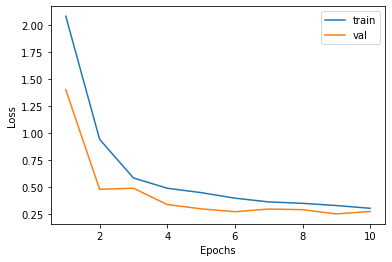

In [ ]:
from tqdm import tqdm
import torch.nn.functional as F
total_train_losses = []
total_val_losses = []

for epoch in range(1,epochs+1):
    ##TRAINING##
    model.train()
    train_losses = []
    confusion_matrix.reset()

    for i, batch, in enumerate(tqdm(train_dataloader)):
        img_batch, lbl_batch = batch

        ##implement the forward and backward backpropagation
        # *****START CODE
        optimizer.zero_grad()
        outputs = model(img_batch.float())
        loss=criterion(outputs, lbl_batch.long())
        loss.backward()
        optimizer.step()
        # *****END CODE

        train_losses.append(loss.item())
        confusion_matrix.add(outputs.data.squeeze(), lbl_batch.long())

        if i % 100 == 0:
            print('Train (epoch {}/{}) [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, epochs, i, len(train_dataloader),100.*i/len(train_dataloader), loss.item()))

    train_acc=(np.trace(confusion_matrix.conf)/float(np.ndarray.sum(confusion_matrix.conf))) *100
    train_loss_mean = np.mean(train_losses)
    total_train_losses.append(train_loss_mean)
    

     ##VALIDATION##
    model.eval()
    val_losses = []
    confusion_matrix.reset()

    for i, batch, in enumerate(tqdm(val_dataloader)):
        img_batch, lbl_batch = batch
   
        ##pass the images to the model and calculate the loss
        # *****START CODE
        with torch.no_grad():
          outputs=model(img_batch.float())
          loss=criterion(outputs, lbl_batch.long())
        # *****END CODE

        confusion_matrix.add(outputs.data.squeeze(), lbl_batch.long())
        val_losses.append(loss.item())

    print('Confusion Matrix:')
    print(confusion_matrix.conf)

    val_acc=(np.trace(confusion_matrix.conf)/float(np.ndarray.sum(confusion_matrix.conf))) *100
    val_loss_mean = np.mean(val_losses)
    total_val_losses.append(val_loss_mean)

    print('TRAIN_LOSS: ', '%.3f' % train_loss_mean, 'TRAIN_ACC: ', '%.3f' % train_acc)
    print('VAL_LOSS: ', '%.3f' % val_loss_mean, 'VAL_ACC: ', '%.3f' % val_acc)

    write_results(save_folder, epoch, train_acc, val_acc, train_loss_mean, val_loss_mean)

    torch.save(model.state_dict(), save_folder + '/model_{}.pt'.format(epoch))

save_graph(total_train_losses, total_val_losses, epochs, save_folder)



Similarly, test the model on the test split.
You will have to load the model previously saved (see [this tutorial](https://pytorch.org/tutorials/beginner/saving_loading_models.html) on how to save and load PyTorch models).

In [ ]:
## Initialize your test DataLoader
# *****START CODE
test_images_file = 'drive/MyDrive/FDL/FDL-LAB03/test_images.npy'
test_csv_file = 'drive/MyDrive/FDL/FDL-LAB03/test.csv'
test_dataset = MyDataset(test_csv_file, test_images_file)

test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)
# *****END CODE

##define the model, load it and put it in evaluation mode
# *****START CODE
model = ConvNet(1,10)
model.load_state_dict(torch.load('drive/MyDrive/FDL/FDL-LAB03/models/model_10.pt'))
model.eval()
# *****END CODE

confusion_matrix = tnt.meter.ConfusionMeter(10) 
confusion_matrix.reset()


for i, batch, in enumerate(tqdm(test_dataloader)):
    # *****START CODE
    img_batch, lbl_batch = batch
    outputs=model(img_batch.float())
    # *****END CODE
    confusion_matrix.add(outputs.data.squeeze(), lbl_batch.long())

print(confusion_matrix.conf)

100%|██████████| 32/32 [00:00<00:00, 33.62it/s]

[[ 98   0   0   0   0   0   1   0   1   0]
 [  0 108   2   0   0   2   0   0   0   0]
 [  1   0  88   1   1   0   1   1   1   0]
 [  2   0   6  76   0   4   1   5   0   1]
 [  0   0   0   0  77   0   1   0   0   5]
 [  1   0   1   1   0  82   0   0   0   0]
 [  1   0   0   0   0   2 112   0   0   0]
 [  0   0   0   0   1   0   0 108   0   2]
 [  3   1   3   1   0   3   1   0  93   4]
 [  0   0   0   2   1   0   0   8   0  85]]


Plot the first six testing images along with their true labels.

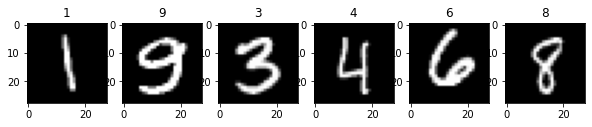

In [ ]:
##plot the testing images
iterator = iter(test_dataset)
plt.figure(figsize=(10,6))
n_images = 6
for i in range(n_images):
  plt.subplot(1, n_images, i+1)
  image, title = next(iterator)
  plt.imshow(image.squeeze(),cmap='gray')
  plt.title(title)

Print the model's predicted labels for the above images.

In [ ]:
##print the predicted labels for the above images
# *****START CODE
iterator = iter(test_dataset)
for i in range(n_images):
    image, title = next(iterator)
    output = model(torch.unsqueeze(torch.tensor(image, dtype=torch.float), dim=0))
    output = torch.argmax(output).item()
    print(output)
# *****END CODE

1
3
3
4
6
8


# Bonus questions
## Example: PyTorch DataLoader for MNIST dataset

In [ ]:
import torch
from torchvision import datasets, transforms 

transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
        ])

dataset1 = datasets.MNIST('../data', train=True, download=True,
                       transform=transform)
dataset2 = datasets.MNIST('../data', train=False,
                       transform=transform)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



In [ ]:
train_loader = torch.utils.data.DataLoader(dataset1, batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset2, batch_size=32, shuffle=False)

In [ ]:
for batch_idx, batch in enumerate(train_loader):
        data, target = batch
        print('data', data.shape)
        print('target', target.shape)

data torch.Size([32, 1, 28, 28])
target torch.Size([32])
data torch.Size([32, 1, 28, 28])
target torch.Size([32])
data torch.Size([32, 1, 28, 28])
target torch.Size([32])
data torch.Size([32, 1, 28, 28])
target torch.Size([32])
data torch.Size([32, 1, 28, 28])
target torch.Size([32])
data torch.Size([32, 1, 28, 28])
target torch.Size([32])
data torch.Size([32, 1, 28, 28])
target torch.Size([32])
data torch.Size([32, 1, 28, 28])
target torch.Size([32])
data torch.Size([32, 1, 28, 28])
target torch.Size([32])
data torch.Size([32, 1, 28, 28])
target torch.Size([32])
data torch.Size([32, 1, 28, 28])
target torch.Size([32])
data torch.Size([32, 1, 28, 28])
target torch.Size([32])
data torch.Size([32, 1, 28, 28])
target torch.Size([32])
data torch.Size([32, 1, 28, 28])
target torch.Size([32])
data torch.Size([32, 1, 28, 28])
target torch.Size([32])
data torch.Size([32, 1, 28, 28])
target torch.Size([32])
data torch.Size([32, 1, 28, 28])
target torch.Size([32])
data torch.Size([32, 1, 28, 28]

## Link to Weight and Biaises (WandB)
Visualisation plateform to log metrics during training and evaluation

First, create an account on [WandB](https://wandb.ai/site) (you can set it up in 2 mins using your Google account)

In [ ]:
# Install wandb on the device (only needed once if you are in local)
!pip install wandb --quiet

     |████████████████████████████████| 1.9 MB 15.0 MB/s 
     |████████████████████████████████| 182 kB 56.1 MB/s 
     |████████████████████████████████| 168 kB 57.2 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 166 kB 57.3 MB/s 
     |████████████████████████████████| 166 kB 69.1 MB/s 
     |████████████████████████████████| 162 kB 54.1 MB/s 
     |████████████████████████████████| 162 kB 69.5 MB/s 
     |████████████████████████████████| 158 kB 59.2 MB/s 
     |████████████████████████████████| 157 kB 59.5 MB/s 
     |████████████████████████████████| 157 kB 57.5 MB/s 
     |████████████████████████████████| 157 kB 57.0 MB/s 
     |████████████████████████████████| 157 kB 50.3 MB/s 
     |████████████████████████████████| 157 kB 58.6 MB/s 
     |████████████████████████████████| 157 kB 58.6 MB/s 
     |████████████████████████████████| 157 kB 59.0 MB/s 
     |████████████████████████████████| 156 kB 51.1 MB/s 


In [ ]:
# Import the library
import wandb

In [ ]:
# Then connect to your W&B account
def wandb_connect():
    wandb_api_key_label = "wandb_api_key"
    wandb_api_key = "" # here use your API key from WandB interface

    wandb_conx = wandb.login(key = wandb_api_key)
    print(f"Connected to Wandb online interface : {wandb_conx}")

wandb_connect()

ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Connected to Wandb online interface : True


In [ ]:
# define model, optimizer, criterion and number of training epochs
# *****START CODE
model = ConvNet(1,10)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()
epochs = 10
confusion_matrix = tnt.meter.ConfusionMeter(10) 
confusion_matrix.reset()
# *****END CODE

In [ ]:
# Complete the hyperparams dict with the infos of your run
# *****START CODE
hyperparams = {"Batch size":32,
               "Learning rate":0.01,
               "Epochs":10}
# *****END CODE

# Init the WandB run with hyperparams
wandb.init(config=hyperparams)

wandb: Currently logged in as: arthurledag. Use `wandb login --relogin` to force relogin


In [ ]:
for epoch in range(epochs):
    ##TRAINING##
    model.train()
    train_losses = []
    confusion_matrix.reset()

    for i, batch, in enumerate(train_dataloader):
        img_batch, lbl_batch = batch

        ##implement the forward and backward backpropagation
        # *****START CODE
        optimizer.zero_grad()
        outputs = model(img_batch.float())
        loss=criterion(outputs, lbl_batch.long())
        loss.backward()
        optimizer.step()
        # *****END CODE

        # log the training loss at each batch
        wandb.log({"train_loss":loss.item()})
        confusion_matrix.add(outputs.data.squeeze(), lbl_batch.long())

    train_acc=(np.trace(confusion_matrix.conf)/float(np.ndarray.sum(confusion_matrix.conf))) *100

    ##VALIDATION##
    model.eval()
    val_losses = []
    confusion_matrix.reset()

    for i, batch, in enumerate(val_dataloader):
        img_batch, lbl_batch = batch
   
        ##pass the images to the model and calculate the loss
        # *****START CODE
        with torch.no_grad():
          outputs=model(img_batch.float())
          loss=criterion(outputs, lbl_batch.long())
        # *****END CODE

        confusion_matrix.add(outputs.data.squeeze(), lbl_batch.long())
        val_losses.append(loss.item())

    val_acc=(np.trace(confusion_matrix.conf)/float(np.ndarray.sum(confusion_matrix.conf))) *100
    val_loss_mean = np.mean(val_losses)

    # log the train & val accuracy and the val loss at each epoch
    wandb.log({"train_acc":train_acc, "val_acc":val_acc, "val_loss":val_loss_mean})

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Go on your WanB account and plot the train and val loss and accuracy on the same chart

## Hyper-parameter tuning

In [ ]:
# Train a model from scratch for all these different learning rates
# and store the final validation accuracy in a array
rates = [10**8, 10**6, 10**4, 10**2, 1, 10**(-2), 10**(-4), 10**(-6)]

# *****START CODE
def get_val_acc(lr):
  model = ConvNet(1,10)
  optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
  criterion = nn.CrossEntropyLoss()
  epochs = 10

  ##TRAINING##
  model.train()
  for epoch in range(epochs):
    for i, batch, in enumerate(train_dataloader):
        img_batch, lbl_batch = batch
        optimizer.zero_grad()
        outputs = model(img_batch.float())
        loss=criterion(outputs, lbl_batch.long())
        loss.backward()
        optimizer.step()

  ##VALIDATION##
  model.eval()
  confusion_matrix = tnt.meter.ConfusionMeter(10) 
  confusion_matrix.reset()

  for i, batch, in enumerate(val_dataloader):
      img_batch, lbl_batch = batch
      with torch.no_grad():
        outputs=model(img_batch.float())

      confusion_matrix.add(outputs.data.squeeze(), lbl_batch.long())

  val_acc=(np.trace(confusion_matrix.conf)/float(np.ndarray.sum(confusion_matrix.conf))) *100

  return val_acc

val_accs = []
for lr in rates:
  print("Training and evaluating network for learning rate : ", lr)
  val_accs.append(get_val_acc(lr))
# *****END CODE

Training and evaluating network for learning rate :  100000000
Training and evaluating network for learning rate :  1000000
Training and evaluating network for learning rate :  10000
Training and evaluating network for learning rate :  100
Training and evaluating network for learning rate :  1
Training and evaluating network for learning rate :  0.01
Training and evaluating network for learning rate :  0.0001
Training and evaluating network for learning rate :  1e-06


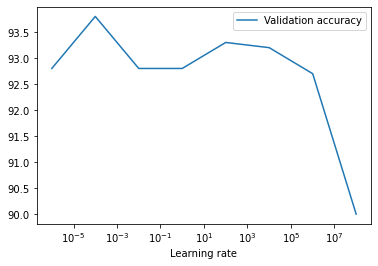

In [ ]:
# Plot the validation error with respect to the learning rate
df_accs = pd.DataFrame({'Learning rate': rates,
                       'Validation accuracy': val_accs,
                  })

df_accs.plot.line(x='Learning rate', y='Validation accuracy', logx=True)